!pip install catboost

0 정상 1 이상

In [66]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import KFold
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from catboost import Pool, CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,precision_recall_curve, roc_curve, classification_report


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family = 'D2coding')
mpl.rc('axes', unicode_minus=False)

sns.set(font="malgun gothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/k-digital/study/oil/train.csv')
data1 = pd.read_csv('C:/k-digital/study/oil/train.csv')
test = pd.read_csv('C:/k-digital/study/oil/test.csv')
data

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,...,NaN,NaN,NaN,NaN,NaN,0,14.5,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,...,7.0,8.0,100.0,1625.0,18890.0,0,NaN,44.3,652,0


In [4]:
data_features = ['YEAR','COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 
                       'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

data = data[data_features]
# test = test[data_features]
# 'COMPONENT_ARBITRARY', 'ANONYMOUS_1'

In [5]:
test_features = ['YEAR','COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 
                       'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']
test = test[test_features]

In [6]:
data.shape

(14095, 18)

In [7]:
data.head(3)

,YEAR,COMPONENT_ARBITRARY,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,2011,COMPONENT3,1486,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,2021,COMPONENT2,1350,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,2015,COMPONENT2,2415,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412


# 라벨인코딩

In [8]:
le = LabelEncoder()
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
for col in categorical_features:    
    data[col] = le.fit_transform(data[col])

In [9]:
le = LabelEncoder()
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
for col in categorical_features:    
    test[col] = le.fit_transform(test[col])

In [10]:
data['YEAR'].unique()

array([ 4, 14,  8,  3,  1,  2,  7, 11,  6,  9, 10,  5, 12,  0, 15, 13],
      dtype=int64)

In [11]:
data.head(3)

,YEAR,COMPONENT_ARBITRARY,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,4,2,1486,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,14,1,1350,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,8,1,2415,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412


In [12]:
# 스케일링
data_need_scale = data.drop(columns = ['COMPONENT_ARBITRARY', 'YEAR'])

ss = StandardScaler()
data_scaled = ss.fit_transform(data_need_scale)
data_scaled

array([[-0.39376339, -0.3407601 , -0.15021362, ..., -0.1065502 ,
         0.89989172, -0.96600175],
       [-0.42602191, -0.0225763 , -0.15021362, ..., -0.1065502 ,
        -1.31737552,  0.11914661],
       [-0.17340923, -0.3407601 , -0.15021362, ..., -0.1065502 ,
        -0.74088603, -0.33221493],
       ...,
       [-0.3221305 ,  0.29560751, -0.15021362, ..., -0.1065502 ,
        -1.11580577,  1.33970343],
       [-0.15372204,  0.29560751, -0.15021362, ..., -0.1065502 ,
        -1.31132842,  0.11914661],
       [-0.29509027, -0.3407601 , -0.15021362, ..., -0.1065502 ,
        -1.25690459,  0.04391969]])

In [13]:
test_need_scale = test.drop(columns = ['COMPONENT_ARBITRARY', 'YEAR'])

ss = StandardScaler()
test_scaled = ss.fit_transform(test_need_scale)
test_scaled

array([[-0.20832585, -0.34182023, -0.14900964, ..., -0.12384153,
        -0.42300603,  0.96054395],
       [-0.08380289, -0.34182023, -0.14900964, ..., -0.12384153,
         0.36151644, -1.0724087 ],
       [-0.2517641 , -0.34182023, -0.14900964, ..., -0.12384153,
        -1.45875198,  0.25023519],
       ...,
       [ 0.23288258, -0.34182023, -0.14900964, ..., -0.12384153,
         4.22462848, -1.07052459],
       [-0.37959664, -0.34182023, -0.14900964, ..., -0.12384153,
        -1.30889938, -0.19441432],
       [-0.16592186,  2.13663024,  5.40757816, ..., -0.12384153,
        -0.6720258 ,  0.73256687]])

In [14]:
data_need_scale.columns

Index(['ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN',
       'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN'],
      dtype='object')

In [15]:
data_name = ['ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN',
       'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']


data_df = pd.DataFrame(data_scaled, columns = data_name)
data_df

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,-0.393763,-0.340760,-0.150214,-0.089633,0.339245,0.336858,1.331290,-0.041588,1.186914,-0.384284,1.384414,5.293270,0.622282,-0.10655,0.899892,-0.966002
1,-0.426022,-0.022576,-0.150214,-0.089633,-0.115388,-0.027612,-0.330406,-0.041588,-0.250456,-0.400998,-0.191804,-0.259244,-0.102635,-0.10655,-1.317376,0.119147
2,-0.173409,-0.340760,-0.150214,-0.089633,-0.080416,-0.252497,-0.326655,-0.041588,-0.250456,-0.400998,-0.191804,-0.260552,-0.102635,-0.10655,-0.740886,-0.332215
3,1.006399,-0.340760,-0.150214,-0.089633,-0.115388,-0.260252,-0.264764,-0.041588,-0.160621,-0.400998,-0.191804,-0.242884,-0.102635,-0.10655,0.482642,-1.093888
4,0.191634,-0.340760,-0.150214,-0.089633,-0.115388,-0.268007,-0.200996,-0.041588,-0.250456,-0.400998,-0.191804,-0.129674,-0.102635,-0.10655,0.478611,-0.866326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,-0.362928,-0.340760,-0.150214,-0.089633,-0.115388,-0.244743,-0.291021,-0.041588,-0.250456,-0.400998,-0.191804,-0.248773,-0.102635,-0.10655,0.524972,-1.076961
14091,-0.085884,-0.340760,-0.150214,-0.089633,-0.115388,-0.252497,-0.311651,-0.041588,-0.250456,3.342831,-0.191804,-0.265787,-0.102635,-0.10655,0.164162,1.540935
14092,-0.322130,0.295608,-0.150214,-0.089633,0.024499,-0.213724,0.444177,-0.041588,0.378393,-0.233862,0.070899,0.150406,-0.102635,-0.10655,-1.115806,1.339703
14093,-0.153722,0.295608,-0.150214,-0.089633,-0.115388,1.050289,-0.298523,-0.041588,-0.250456,-0.384284,-0.191804,-0.264479,-0.102635,-0.10655,-1.311328,0.119147


In [16]:
test_name = ['ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN',
       'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']


test_df = pd.DataFrame(test_scaled, columns = data_name)
test_df

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,-0.208326,-0.34182,-0.149010,-0.114836,-0.149412,-0.236485,-0.270094,-0.073334,-0.276403,-0.402347,-0.154766,-0.256602,-0.108232,-0.123842,-0.423006,0.960544
1,-0.083803,-0.34182,-0.149010,-0.114836,-0.054711,-0.236485,0.114896,-0.073334,-0.011265,-0.402347,-0.154766,1.245189,0.027530,-0.123842,0.361516,-1.072409
2,-0.251764,-0.34182,-0.149010,-0.114836,-0.149412,-0.139025,-0.280225,-0.073334,-0.276403,-0.402347,-0.154766,-0.256050,-0.108232,-0.123842,-1.458752,0.250235
3,-0.371323,-0.34182,-0.149010,-0.114836,-0.007360,-0.216993,-0.051547,-0.073334,0.077114,-0.354146,-0.154766,4.155529,-0.108232,-0.123842,0.711907,-0.917912
4,1.039593,-0.34182,-0.149010,-0.114836,-0.149412,-0.203999,-0.268646,-0.073334,-0.276403,-0.402347,-0.154766,-0.253291,-0.108232,-0.123842,-1.037842,-0.211371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,-0.307200,-0.34182,-0.149010,-0.114836,-0.007360,0.601670,1.227891,-0.073334,5.468260,-0.322013,0.195596,0.840776,-0.108232,-0.123842,-0.865953,1.096200
6037,0.192754,-0.34182,-0.149010,-0.114836,0.087341,-0.229988,0.777772,-0.073334,0.165494,-0.402347,-0.154766,0.120225,-0.108232,-0.123842,0.601721,-1.070525
6038,0.232883,-0.34182,-0.149010,-0.114836,-0.149412,-0.242983,-0.210753,-0.073334,-0.276403,-0.402347,-0.154766,-0.224050,-0.108232,-0.123842,4.224628,-1.070525
6039,-0.379597,-0.34182,-0.149010,-0.114836,-0.149412,0.159852,-0.284567,-0.073334,-0.276403,-0.402347,-0.154766,-0.259360,-0.108232,-0.123842,-1.308899,-0.194414


In [17]:
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
data_label = data[categorical_features]
data_new = pd.concat([data_label,data_df], axis=1)

In [18]:
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
test_label = test[categorical_features]
test_new = pd.concat([test_label,test_df], axis=1)

In [19]:
test_new.head(3)

,COMPONENT_ARBITRARY,YEAR,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,0,9,-0.208326,-0.34182,-0.14901,-0.114836,-0.149412,-0.236485,-0.270094,-0.073334,-0.276403,-0.402347,-0.154766,-0.256602,-0.108232,-0.123842,-0.423006,0.960544
1,2,4,-0.083803,-0.34182,-0.14901,-0.114836,-0.054711,-0.236485,0.114896,-0.073334,-0.011265,-0.402347,-0.154766,1.245189,0.027530,-0.123842,0.361516,-1.072409
2,1,3,-0.251764,-0.34182,-0.14901,-0.114836,-0.149412,-0.139025,-0.280225,-0.073334,-0.276403,-0.402347,-0.154766,-0.256050,-0.108232,-0.123842,-1.458752,0.250235


In [20]:
data_new.head(3)

,COMPONENT_ARBITRARY,YEAR,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,2,4,-0.393763,-0.340760,-0.150214,-0.089633,0.339245,0.336858,1.331290,-0.041588,1.186914,-0.384284,1.384414,5.293270,0.622282,-0.10655,0.899892,-0.966002
1,1,14,-0.426022,-0.022576,-0.150214,-0.089633,-0.115388,-0.027612,-0.330406,-0.041588,-0.250456,-0.400998,-0.191804,-0.259244,-0.102635,-0.10655,-1.317376,0.119147
2,1,8,-0.173409,-0.340760,-0.150214,-0.089633,-0.080416,-0.252497,-0.326655,-0.041588,-0.250456,-0.400998,-0.191804,-0.260552,-0.102635,-0.10655,-0.740886,-0.332215


In [21]:
answer = data1['Y_LABEL'] 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_new, answer, test_size = 0.2, stratify = answer, random_state = 2022)

In [23]:
y_train

6576     0
5159     0
6330     0
6953     0
428      1
        ..
1120     0
12553    0
1790     0
7443     0
9124     0
Name: Y_LABEL, Length: 11276, dtype: int64

# 함수 설정

In [24]:
# 점수 구하기 
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1 : {:.4f}, AUC : {:.4f}'.
          format(accuracy, precision, recall, f1, roc_auc))
    print('Macro f1 socre : ', f1_score(y_test, pred, average='macro'))

# 훈련 시키기 
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

# NGBoost

from ngboost import NGBRegressor

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, Y = load_boston(True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

ngb = NGBRegressor().fit(X_train, Y_train)
Y_preds = ngb.predict(X_test)
Y_dists = ngb.pred_dist(X_test)

# test Mean Squared Error
test_MSE = mean_squared_error(Y_preds, Y_test)
print('Test MSE', test_MSE)

# test Negative Log Likelihood
test_NLL = -Y_dists.logpdf(Y_test).mean()
print('Test NLL', test_NLL)

In [25]:
#!pip install ngboost

In [27]:
from ngboost import NGBClassifier
from sklearn.metrics import mean_squared_error
ngb = NGBClassifier().fit(X_train, y_train)
pred = ngb.predict(X_test)
pred_pro = ngb.predict_proba(X_test)

# test Mean Squared Error
test_MSE = mean_squared_error(pred, y_test)
print('Test MSE', test_MSE)
#get_clf_eval(y_test, pred)
f1 = f1_score(y_test, pred)
print('Macro f1 socre : ', f1_score(y_test, pred, average='macro'))
print(ngb.score(X_test,pred))                   

[iter 0] loss=0.2916 val_loss=0.0000 scale=1.0000 norm=2.0000
[iter 100] loss=0.2728 val_loss=0.0000 scale=1.0000 norm=1.8937
[iter 200] loss=0.2660 val_loss=0.0000 scale=2.0000 norm=3.7976
[iter 300] loss=0.2621 val_loss=0.0000 scale=1.0000 norm=1.9046
[iter 400] loss=0.2599 val_loss=0.0000 scale=1.0000 norm=1.9181
Test MSE 0.08513657325292658
Macro f1 socre :  0.48189353607508467
0.07740175487870596


# 임계값
- 정밀도, 재현율이 상대적으로 높고
- 오차행렬의 fp와 fn값을 줄인다. 
- 이상인데 이상이 없다고한 2종 오류를 줄여야한다. 

In [57]:
len(y_test)

2819

In [36]:
pred_proba

array([[0.87458239, 0.12541761],
       [0.84266322, 0.15733678],
       [0.88762214, 0.11237786],
       ...,
       [0.94723534, 0.05276466],
       [0.93762948, 0.06237052],
       [0.89200874, 0.10799126]])

In [53]:
a = []
b = []
for i in pred_proba[:,1]:
    if i <= 0.5:
        a.append(i)
    else:
        b.append(i)

In [55]:
print(len(a))
print(len(b))

2818
1


In [78]:
# 테스트
pred_proba_test = ngb.predict_proba(test_new)
binarizer = Binarizer(threshold =0.138)
thres_pred_test = binarizer.transform(pred_proba_test[:,1].reshape(-1,1))

In [74]:
from sklearn.preprocessing import Binarizer

thresholds = [0.4, 0.45, 0.50, 0.55, 0.138]

for custom_threshold in thresholds:
    pred_proba = ngb.predict_proba(X_test)
    
    binarizer = Binarizer(threshold = custom_threshold)
    thres_pred = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))
    
    print(binarizer.fit_transform(pred_proba[:,1].reshape(-1,1)))
    f1 = f1_score(y_test, thres_pred)
    get_clf_eval(y_test, thres_pred, pred_proba[:,1].reshape(-1,1))

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
오차 행렬
[[2578    0]
 [ 240    1]]
정확도 : 0.9149, 정밀도 : 1.0000, 재현율 : 0.0041, F1 : 0.0083, AUC : 0.6947
Macro f1 socre :  0.48189353607508467
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
오차 행렬
[[2578    0]
 [ 240    1]]
정확도 : 0.9149, 정밀도 : 1.0000, 재현율 : 0.0041, F1 : 0.0083, AUC : 0.6947
Macro f1 socre :  0.48189353607508467
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
오차 행렬
[[2578    0]
 [ 240    1]]
정확도 : 0.9149, 정밀도 : 1.0000, 재현율 : 0.0041, F1 : 0.0083, AUC : 0.6947
Macro f1 socre :  0.48189353607508467
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
오차 행렬
[[2578    0]
 [ 241    0]]
정확도 : 0.9145, 정밀도 : 0.0000, 재현율 : 0.0000, F1 : 0.0000, AUC : 0.6947
Macro f1 socre :  0.4776727811747267
[[0.]
 [1.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
오차 행렬
[[2390  188]
 [ 193   48]]
정확도 : 0.8648, 정밀도 : 0.2034, 재현율 : 0.1992, F1 : 0.2013, AUC : 0.6947
Macro f1 socre :  0.5637174795484762


### 일단 패스 
from sklearn.preprocessing import Binarizer

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = ngb.predict_proba(X_test)

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

# 임계값 그래프 그리기 

In [67]:
# 함수 

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize = (10, 7))
    plt.rc('font', family = 'D2coding')
    threshold_boundary = thresholds.shape[0]
    a = thresholds[precisions[0:threshold_boundary] == recalls[0:threshold_boundary]]
    loc = np.where(thresholds == a[0])[0][0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label = 'recall')
    plt.scatter(thresholds[loc], precisions[loc], c = 'black', s = 60)
    plt.text(0.02 + thresholds[loc], precisions[loc], '임계값 : {:.3f}'.format(thresholds[loc]), size = 15)
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2), size = 15)
    plt.xlabel('Threshold value', size = 15); plt.ylabel('Precision and Recall value', size = 15)
    plt.legend()
    plt.rc('legend', fontsize = 15)
    plt.rc('ytick', labelsize = 15)
    plt.show()

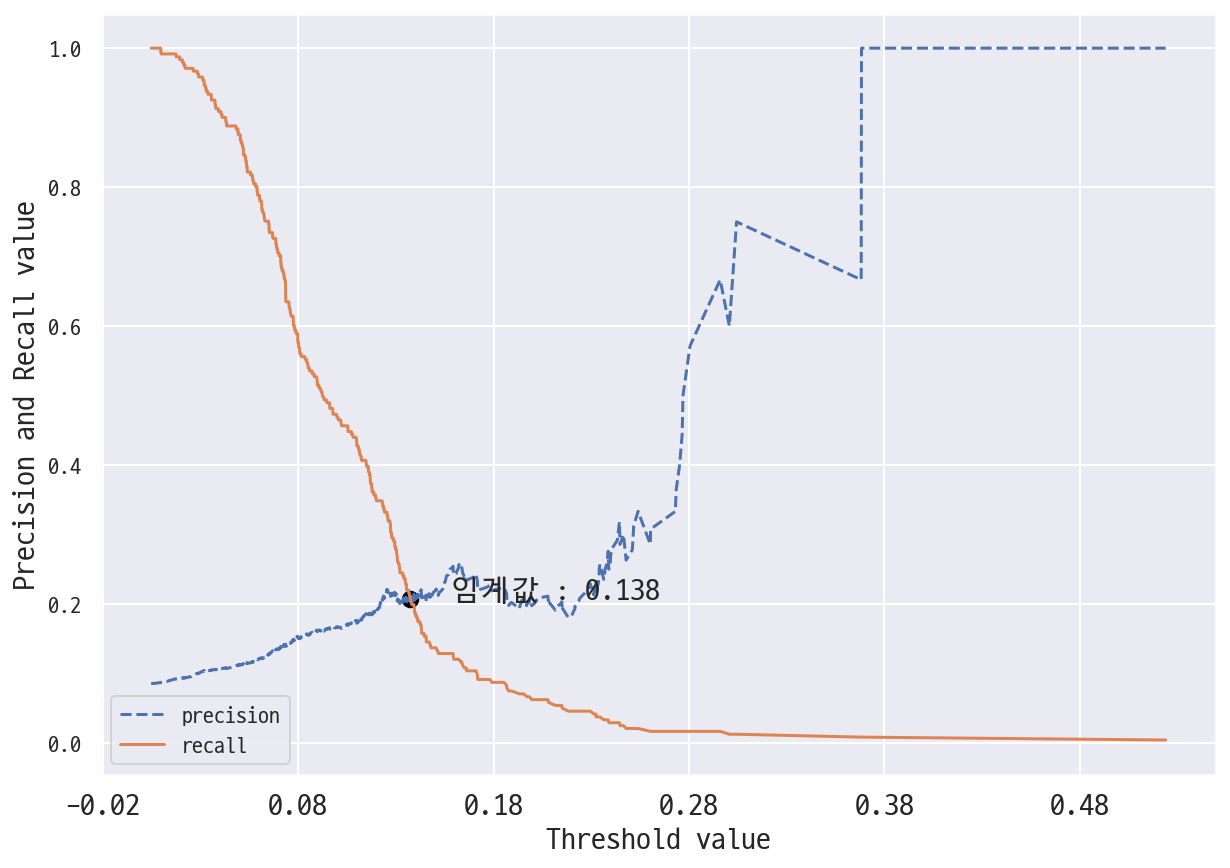

In [68]:
precision_recall_curve_plot(y_test, pred_proba[:,1].reshape(-1,1))

# test파일 적용

In [ ]:
test_new

In [ ]:
preds = lgbm_wrapper.predict(test_new)
#pred_proba = lgbm_wrapper.predict_proba(test_new)[:, 1]
#get_clf_eval(y_val, preds, pred_proba)

In [ ]:
preds

# 예측

In [ ]:
from sklearn.model_selection import cross_val_predict

# 중요도

In [ ]:
#feature 중요도도 그려볼 수 있다. 
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 15))

# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(lgbm_wrapper, ax=ax)
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize = 30)
plt.show()

# 파일에 넣기

In [79]:
sub = pd.read_csv('NGB+thres.csv')

In [80]:
sub['Y_LABEL'] = thres_pred_test
sub.head(3)

,ID,Y_LABEL
0,TEST_0000,0.0
1,TEST_0001,0.0
2,TEST_0002,0.0


In [81]:
sub.to_csv('LGBM+oversample+hyperopt.csv',index=False)

# TEST

In [ ]:
test_new